**Tesla Stock Price Prediction with Facebook Prophet**

Tesla is an amAmericanlectric vehicle company whose aim is to accelerate the world’s transition towards sustainable energy. A few days back the rise in the stock prices of Tesla made Elon Musk the richest person in the world. Predicting stock prices is a great use case of machine learning

In [9]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet


The dataset that I will be using here has been downloaded from yahoo finance.

In [11]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


In [12]:
import io
df = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))
# Dataset is now stored in a Pandas Dataframe

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-07,109.000000,113.000000,106.468002,109.089996,109.089996,89599000
1,2020-04-08,110.839996,111.442001,106.666000,109.767998,109.767998,63280000
2,2020-04-09,112.417999,115.036003,111.421997,114.599998,114.599998,68250000
3,2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000
4,2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500


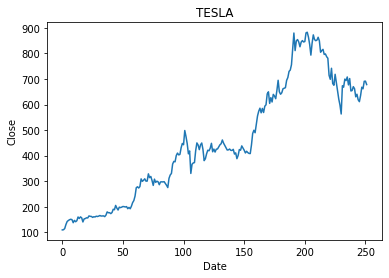

In [14]:
close = df['Close']
ax = close.plot(title="TESLA")
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [15]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
data = df[["Date", "Close"]]

We only need two columns from this dataset (Date and Close), so let’s create a new DataFrame with only these two columns:

In [16]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [18]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-04-03,-214.672493,-1119.139225,682.797763
613,2022-04-04,-221.109556,-1123.020568,633.934790
614,2022-04-05,-221.567556,-1119.253956,670.004825
615,2022-04-06,-223.782068,-1131.105600,674.535797
616,2022-04-07,-227.918464,-1139.529080,678.222422


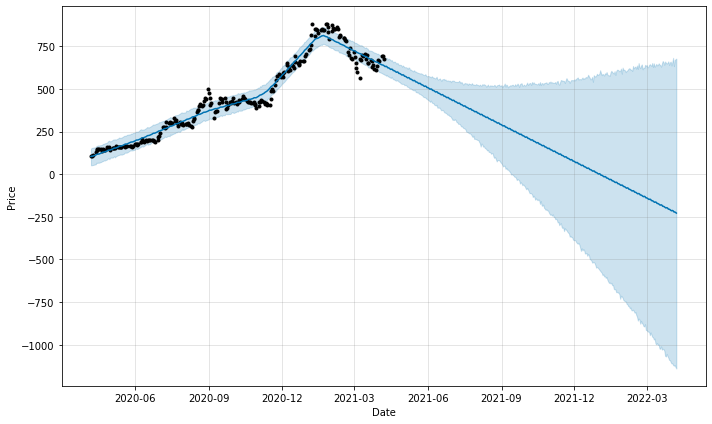

In [19]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

In [ ]:
#seems like Tesla’s stock prices will decrease in the coming future